In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


# 1. Perform basic exploratory data analysis which should include the following and print out your insights at every step:

#### A. The shape of the data

In [6]:
df.shape

(1338, 7)

#### B. The data type of each attribute

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

#### C. Checking the presence of missing values

In [8]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### D. 5 points summary of numerical attributes

In [10]:
df.select_dtypes(exclude='object').describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### E. Distribution of 'bmi', 'age' and 'charges' columns

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

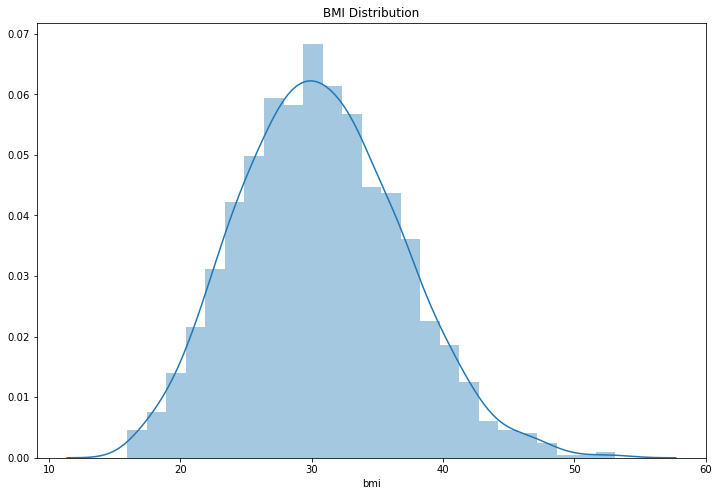

In [28]:
plt.figure(figsize=(12, 8))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

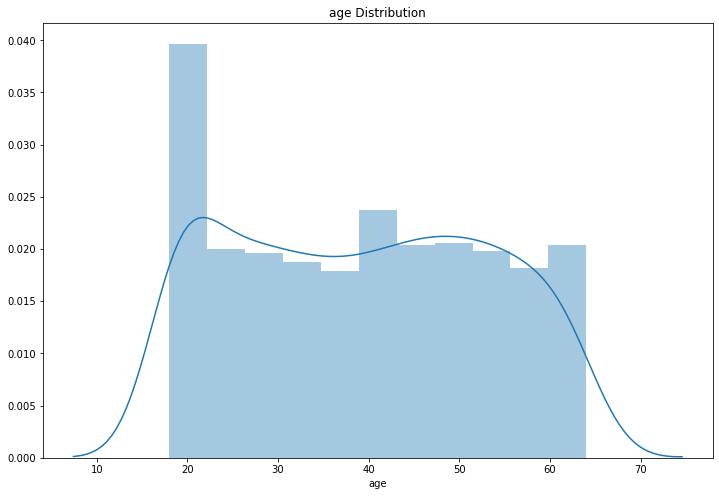

In [29]:
plt.figure(figsize=(12, 8))
sns.distplot(df['age'])
plt.title('age Distribution')

plt.show()

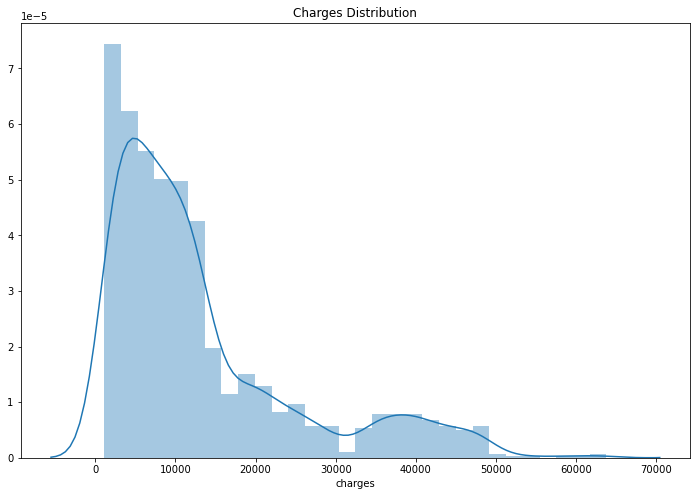

In [27]:
plt.figure(figsize=(12, 8))
sns.distplot(df['charges'])
plt.title('Charges Distribution')

plt.show()

#### F. The measure of skewness of 'bmi', 'age', and 'charges' columns

In [14]:
df[['bmi', 'age', 'charges']].skew()

bmi        0.284047
age        0.055673
charges    1.515880
dtype: float64

#### G. Checking the presence of outliers in 'bmi', 'age' and 'charges' columns

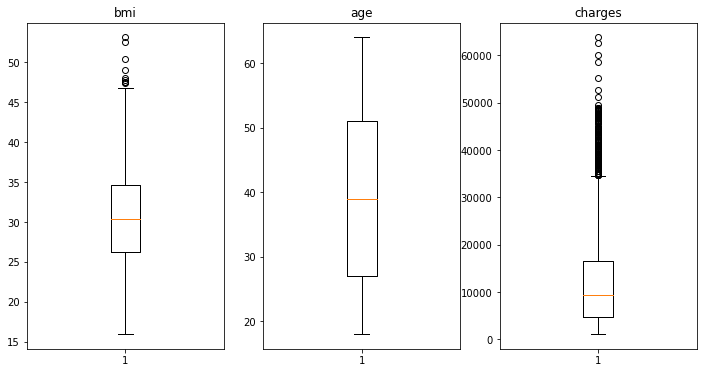

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

ax[0].boxplot(df['bmi'])
ax[0].set_title('bmi')

ax[1].boxplot(df['age'])
ax[1].set_title('age')

ax[2].boxplot(df['charges'])
ax[2].set_title('charges')

plt.show()

In [16]:
# function to Identify outlier using IQR
def IQR_outlier_identifier(df, col):
    quantiles = np.quantile(df[col], [0.25, 0.75])
    IQR = quantiles[1] - quantiles[0]
    mild_lower_threshold = quantiles[0] - 1.5 * IQR
    mild_upper_threshold = quantiles[1] + 1.5 * IQR
    extreme_lower_threshold = quantiles[0] - 3 * IQR
    extreme_upper_threshold = quantiles[1] + 3 * IQR
    
    return mild_lower_threshold, mild_upper_threshold, extreme_lower_threshold, extreme_upper_threshold

##### BMI Outlier

In [17]:
print('mild lower threshold: ', IQR_outlier_identifier(df, 'bmi')[0],
      '\nextreme lower threshold: ', IQR_outlier_identifier(df, 'bmi')[2],
      '\nmild upper threshold: ', IQR_outlier_identifier(df, 'bmi')[1],
      '\nextreme upper threshold: ', IQR_outlier_identifier(df, 'bmi')[3])

mild lower threshold:  13.7 
extreme lower threshold:  1.103749999999998 
mild upper threshold:  47.290000000000006 
extreme upper threshold:  59.886250000000004


In [18]:
#BMI lower mild outlier
bmi_lower_mildoutlier = df['bmi'][df['bmi'] < IQR_outlier_identifier(df, 'bmi')[0]]
bmi_lower_mildoutlier

Series([], Name: bmi, dtype: float64)

In [19]:
#BMI upper mild outlier
bmi_upper_mildoutlier = df['bmi'][(df['bmi'] > IQR_outlier_identifier(df, 'bmi')[1]) & 
                                  (df['bmi'] < IQR_outlier_identifier(df, 'bmi')[3])]
bmi_upper_mildoutlier

116     49.06
286     48.07
401     47.52
543     47.41
847     50.38
860     47.60
1047    52.58
1088    47.74
1317    53.13
Name: bmi, dtype: float64

In [20]:
#BMI upper extreme outlier
bmi_upper_extremeoutlier = df['bmi'][df['bmi'] > IQR_outlier_identifier(df, 'bmi')[3]]
bmi_upper_extremeoutlier

Series([], Name: bmi, dtype: float64)

##### Charges outlier

In [21]:
print('mild lower threshold: ', IQR_outlier_identifier(df, 'charges')[0],
      '\nextreme lower threshold: ', IQR_outlier_identifier(df, 'charges')[2],
      '\nmild upper threshold: ', IQR_outlier_identifier(df, 'charges')[1],
      '\nextreme upper threshold: ', IQR_outlier_identifier(df, 'charges')[3])

mild lower threshold:  -13109.1508975 
extreme lower threshold:  -30958.588945 
mild upper threshold:  34489.350562499996 
extreme upper threshold:  52338.78861


In [22]:
#Charges lower mild outlier
charges_lower_mildoutlier = df['charges'][df['charges'] < IQR_outlier_identifier(df, 'charges')[0]]
charges_lower_mildoutlier

Series([], Name: charges, dtype: float64)

In [23]:
#Charges upper mild outlier
charges_upper_mildoutlier = df['charges'][(df['charges'] > IQR_outlier_identifier(df, 'charges')[1]) & 
                                  (df['charges'] < IQR_outlier_identifier(df, 'charges')[3])]
charges_upper_mildoutlier

14      39611.75770
19      36837.46700
23      37701.87680
29      38711.00000
30      35585.57600
           ...     
1291    34828.65400
1301    46718.16325
1303    37829.72420
1313    36397.57600
1323    43896.37630
Name: charges, Length: 133, dtype: float64

In [24]:
#Charges upper extreme outlier
charges_upper_extremeoutlier = df['charges'][df['charges'] > IQR_outlier_identifier(df, 'charges')[3]]
charges_upper_extremeoutlier

543     63770.42801
577     58571.07448
819     55135.40209
1146    52590.82939
1230    60021.39897
1300    62592.87309
Name: charges, dtype: float64

# 2. Answer the following questions with statistical evidence

#### A. Do charges of people who smoke differ significantly from the people who don't? (Hypothesis Testing)

In [ ]:
smoker = df['charges'][df['smoker'] == 'yes']
no_smoker = df['charges'][df['smoker'] == 'no']

In [29]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

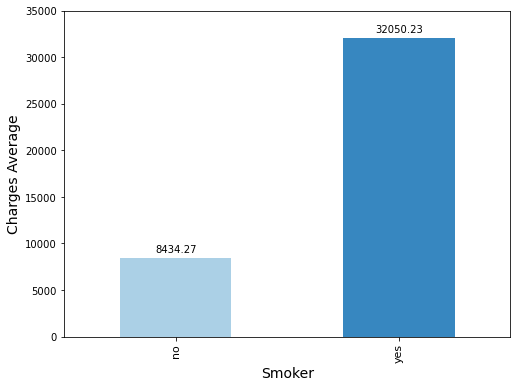

In [165]:
# Init visualization syntax
plt.figure(figsize=(8, 6))
ax = df.groupby(df['smoker'])['charges'].mean().plot(kind='bar', color=sns.color_palette("Blues",2))
plt.ylabel('Charges Average', fontsize=14)
plt.xlabel('Smoker', fontsize=14)
plt.yticks(np.arange(0, 40000, 5000))
plt.xticks(fontsize=11)

#Annotate Barplot
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.show()

In [59]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

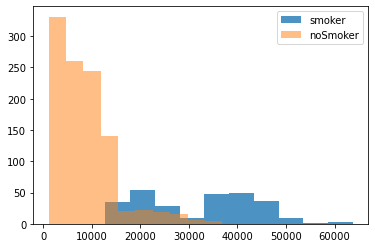

In [57]:
# Visualize distribution
plt.hist(smoker, label='smoker', alpha=0.8)
plt.hist(no_smoker, label='noSmoker', alpha=0.5)

plt.legend()

plt.show()

print('no_smoker skewness: ', no_smoker.skew(),'\nsmoker skewness: ', smoker.skew())

We can hypothesize from the graph that both smoker nor noSmoker distribution don't look like gaussian distribution and skewed positively, but we will validate that using shapiro-Wilk. We choose Shapiro-Wilk because it's a powerful normality test than others. 

- Take a note that those variables data points are not balance (no smoker = 1024, smoker = 274).

In [25]:
# Shapiro-Wilk Normality Test
from scipy.stats import shapiro

In [121]:
# Normality Test for Smoker

stat, p = shapiro(smoker)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.940, p=0.000
Probably not Gaussian


In [122]:
# Normality Test for no_smoker

stat, p = shapiro(no_smoker)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.873, p=0.000
Probably not Gaussian


##### Conclusion

As we can see that, both smoker nor no_smoker are not gaussian or normally distributed. So we should use non-parametric test to do a hypothesis testing

In [162]:
# Determine Null Hypothesis from mean difference
empirical_diff_means = np.mean(smoker) - np.mean(no_smoker)
print('The difference average charge between smoker & non_smoker : ', empirical_diff_means.round(2))

The difference average charge between smoker & non_smoker :  23615.96


There is a very high difference average charge between smoker & non smoker. So, We can determine H0 that the original observation of smoker and non smoker charges are significantly different.

##### Hypothesis Testing: 
- H0 : Charges of people who smoke differ significantly from the people who don't.
- Ha : Similar

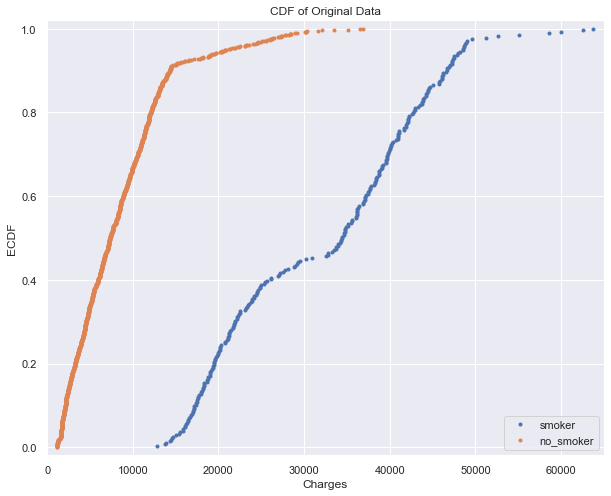

In [142]:
# Plotting an ECDF 
x_smoker, y_smoker = ecdf(smoker)
x_noSmoker, y_noSmoker = ecdf(no_smoker)
plt.figure(figsize=(10,8))
plt.plot(x_smoker, y_smoker, marker='.', linestyle='none', label='smoker')
plt.plot(x_noSmoker, y_noSmoker, marker='.', linestyle='none', label='no_smoker')

# Set margings
plt.margins(0.02)

# Add axis labels and legend
plt.xlabel('Charges')
plt.ylabel('ECDF')
plt.legend(loc='lower right')
plt.title('CDF of Original Data')

plt.show()

Eyeballing it, those two cumulative distribution function (CDFs) are not identically distributed. Non-smoker's charge tend to be less than smoker's charge. We will try to use permutation method to simulate what if the variables are concatenated and randomly distributed, will it be a identically distributed with one of the variable?

In [143]:
def permutation_sample(data1, data2):
    """Draw a single permutation sample"""
    
    data = np.concatenate([data1, data2])
        
    permuted_data = np.random.permutation(data)
        
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff
    
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates



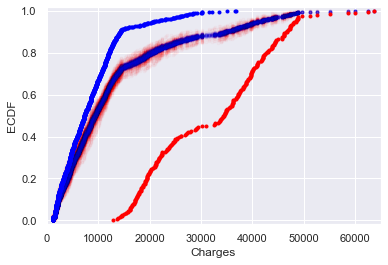

In [127]:
for _ in range(50):
    perm_sample_1, perm_sample_2 = permutation_sample(smoker, no_smoker)
    
    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)
    
x_1, y_1 = ecdf(smoker)
x_2, y_2 = ecdf(no_smoker)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Charges')
_ = plt.ylabel('ECDF')
plt.show()

None of ECDFs from permutation samples overlap with observed data (purple haze line), suggesting that the hypothesis is commensurate with the data. Smoker & no Smoker are not identically distributed.

But how to quantify the assessment of hypothesis testing from above? --> should use test statistic.
Test statistic is used because it serves as basis of comparison between two (Hypothesis predict and what it actually observed)

- If two observed variables are identical, they should have the same mean charges. So the difference mean between those two variables mean are 0
- In this observation context, p value comes from total permutation replicates that are greater or equal to empirical diff means divided by total size of permutation replicates

In [197]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(smoker, no_smoker)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(smoker, no_smoker, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

if p > 0.05:
    print('Probably the same distribution (reject H0)')

else:
    print('Probably different distributions (fail to reject H0)')

p-value = 0.0
Probably different distributions (fail to reject H0)


### OR we can use

### Shortcut way Using Mann-Whitney Test

I will use Mann-Whitney Test considering that:
- the data groups are Non parametric 
- The varlables data type either smoker or non-smoker are continuous data
- data groups are independent and Mann Whitney is used to compare differences between two independent groups or in other word, it is used for unpaired u-test

In [233]:
# Mann Whitney Test
np.random.seed(123)

random_smoker = np.random.choice(smoker, size=200)
random_no_smoker = np.random.choice(no_smoker, size=200)

from scipy.stats import mannwhitneyu
coef, p = mannwhitneyu(random_smoker, random_no_smoker)
print('coef=%.3f, p=%.3f' % (coef, p))
if p > 0.05:
    print('Probably the same distribution (reject H0)')

else:
    print('Probably different distributions (fail to reject H0)')

coef=992.000, p=0.000
Probably different distributions (fail to reject H0)
